In [1]:
import qiskit
import numpy as np
from qiskit import *
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from math import sqrt, pi

In [2]:
q = QuantumRegister(4)
c = ClassicalRegister(3)

In [39]:
circuit = QuantumCircuit(q,c)

circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.x(3)
circuit.h(3)

N = 20 # times of iteration

for i in range(N):
    circuit.x(0)
    circuit.mct(list(range(3)), 3)
    circuit.x(0)
    circuit.h(0)
    circuit.h(1)
    circuit.h(2)
    circuit.x(0)
    circuit.x(1)
    circuit.x(2)
    circuit.h(2)
    circuit.mct(list(range(2)), 2)
    circuit.h(2)
    circuit.x(0)
    circuit.x(1)
    circuit.x(2)
    circuit.h(0)
    circuit.h(1)
    circuit.h(2)

circuit.measure(q[0], c[0])
circuit.measure(q[1], c[1])
circuit.measure(q[2], c[2])

circuit.draw()

┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐»
q0_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├»
      ├───┤└───┘  │  ├───┤├───┤└───┘  │  ├───┤├───┤└───┘  │  ├───┤├───┤└───┘»
q0_1: ┤ H ├───────■──┤ H ├┤ X ├───────■──┤ X ├┤ H ├───────■──┤ H ├┤ X ├─────»
      ├───┤       │  ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐  │  ├───┤├───┤┌───┐»
q0_2: ┤ H ├───────■──┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├──■──┤ H ├┤ X ├┤ H ├»
      ├───┤┌───┐┌─┴─┐└───┘└───┘└───┘└───┘└───┘└───┘└───┘┌─┴─┐└───┘└───┘└───┘»
q0_3: ┤ X ├┤ H ├┤ X ├───────────────────────────────────┤ X ├───────────────»
      └───┘└───┘└───┘                                   └───┘               »
c0: 3/══════════════════════════════════════════════════════════════════════»
                                                                            »
«           ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐»
«q0_0: ──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├»
«        │  ├───┤├───┤└───┘  │  ├───┤├───┤└───┘  │  ├───┤├───┤└───┘  │  ├───┤»
«q0_1: ──■──┤ X ├┤ H ├───────■──┤ H ├┤ X ├───────■──┤ X ├┤ H ├───────■──┤ H ├»
«      ┌─┴─┐├───┤├───┤┌───┐  │  ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐  │  ├───┤»
«q0_2: ┤ X ├┤ H ├┤ X ├┤ H ├──■──┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├──■──┤ H ├»
«      └───┘└───┘└───┘└───┘┌─┴─┐└───┘└───┘└───┘└───┘└───┘└───┘└───┘┌─┴─┐└───┘»
«q0_3: ────────────────────┤ X ├───────────────────────────────────┤ X ├─────»
«                          └───┘                                   └───┘     »
«c0: 3/══════════════════════════════════════════════════════════════════════»
«                                                                            »
«      ┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐»
«q0_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├»
«      ├───┤└───┘  │  ├───┤├───┤└───┘  │  ├───┤├───┤└───┘  │  ├───┤├───┤└───┘»
«q0_1: ┤ X ├───────■──┤ X ├┤ H ├───────■──┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────»
«      ├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐  │  ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐»
«q0_2: ┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├──■──┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├»
«      └───┘└───┘└───┘└───┘└───┘└───┘┌─┴─┐└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
«q0_3: ──────────────────────────────┤ X ├───────────────────────────────────»
«                                    └───┘                                   »
«c0: 3/══════════════════════════════════════════════════════════════════════»
«                                                                            »
«           ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐»
«q0_0: ──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├»
«        │  ├───┤├───┤└───┘  │  ├───┤├───┤└───┘  │  ├───┤├───┤└───┘  │  ├───┤»
«q0_1: ──■──┤ H ├┤ X ├───────■──┤ X ├┤ H ├───────■──┤ H ├┤ X ├───────■──┤ X ├»
«        │  ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐  │  ├───┤├───┤┌───┐┌─┴─┐├───┤»
«q0_2: ──■──┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├──■──┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├»
«      ┌─┴─┐└───┘└───┘└───┘└───┘└───┘└───┘└───┘┌─┴─┐└───┘└───┘└───┘└───┘└───┘»
«q0_3: ┤ X ├───────────────────────────────────┤ X ├─────────────────────────»
«      └───┘                                   └───┘                         »
«c0: 3/══════════════════════════════════════════════════════════════════════»
«                                                                            »
«      ┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐»
«q0_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├»
«      ├───┤└───┘  │  ├───┤├───┤└───┘  │  ├───┤├───┤└───┘  │  ├───┤├───┤└───┘»
«q0_1: ┤ H ├───────■──┤ H ├┤ X ├───────■──┤ X ├┤ H ├───────■──┤ H ├┤ X ├─────»
«      ├───┤┌───┐  │  ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐  │  ├───┤├───┤┌───┐»
«q0_2: ┤ X ├┤ H ├──■──┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├──■──┤ H ├┤ X ├┤ H ├»
«      └───┘└───┘┌─┴─┐└───┘└───┘└───┘└───┘└───┘└───┘└───┘┌─┴─┐└───┘

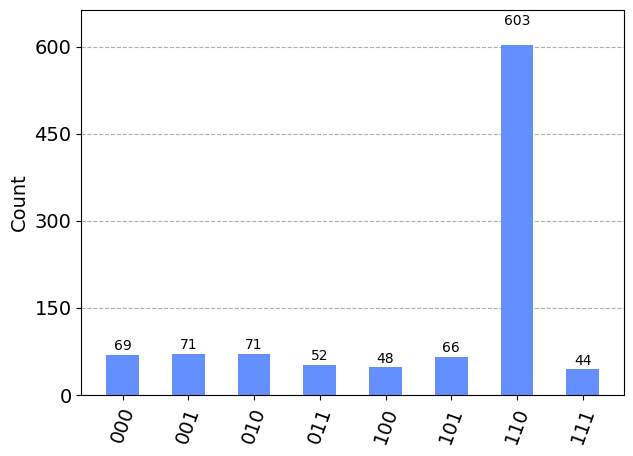

In [40]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)